提取8个模型结果，生成时间，真实值，预测值，绝对误差表格

In [1]:
# 定义提取结果函数
import pandas as pd

def extraction_all(name):
    if name == "DT":
        df = pd.read_csv("test_results_DT.csv")
    elif name == "kNN":
        df = pd.read_csv("test_results_kNN.csv")
    elif name == "Lasso":
        df = pd.read_csv("test_results_Lasso.csv")
    elif name == "LGBM":
        df = pd.read_csv("test_results_LGBM.csv")
    elif name == "RF":
        df = pd.read_csv("test_results_RF.csv")
    elif name == "SVR":
        df = pd.read_csv("test_results_SVR.csv")
    elif name == "CGB":
        df = pd.read_csv("test_results_CGB.csv")
    elif name == "TabPFN":
        df = pd.read_csv("test_results_TabPFN.csv")
    elif name == "XGB":
        df = pd.read_csv("test_results_XGB.csv")
    else:
        raise ValueError("模型名无效，请输入: DT, kNN, Lasso, LGBM, RF, SVR, CGB, TabPFN, XGB")
    
    # 取三列并重命名
    df_out = df[['time', 'true_value', 'predicted_value']].copy()
    df_out.rename(columns={
        'time': 'Time',
        'true_value': 'Experimental_value',
        'predicted_value': 'Predicted_value'
    }, inplace=True)

    # 计算绝对误差
    df_out['Absolute_Error'] = (df_out['Predicted_value'] - df_out['Experimental_value']).abs()

    return df_out


In [2]:
# 对模型结果进行提取计算绝对误差
ALL_DT = extraction_all("DT")
ALL_TabPFN = extraction_all("TabPFN")
ALL_kNN = extraction_all("kNN")
ALL_LGBM = extraction_all("LGBM")
ALL_RF = extraction_all("RF")
ALL_lasso = extraction_all("Lasso")
ALL_SVR = extraction_all("SVR")
ALL_XGB = extraction_all("XGB")

In [3]:
ALL_DT.head()

,Time,Experimental_value,Predicted_value,Absolute_Error
0,1,-1.926380,-1.415457,0.510923
1,2,-1.643113,-1.415457,0.227656
2,3,-1.516825,-1.415457,0.101368
3,4,-1.392053,-1.415457,0.023405
4,5,-1.226568,-1.415457,0.188889


In [4]:
ALL_AE = pd.DataFrame(ALL_lasso['Absolute_Error'].values, columns=['Lasso'])
ALL_AE['RF'] = ALL_RF['Absolute_Error'].values
ALL_AE['DT'] = ALL_DT['Absolute_Error'].values
ALL_AE['kNN'] = ALL_kNN['Absolute_Error'].values
ALL_AE['LGBM'] = ALL_LGBM['Absolute_Error'].values
ALL_AE['TabPFN'] = ALL_TabPFN['Absolute_Error'].values
ALL_AE['SVR'] = ALL_SVR['Absolute_Error'].values
ALL_AE['XGB'] = ALL_XGB['Absolute_Error'].values

sorted_index = ALL_AE.mean().sort_values().index
df9 = ALL_AE[sorted_index]
df9.to_csv("Figure_1_dataset.csv", index=False)
df9.describe()

,TabPFN,XGB,LGBM,DT,RF,SVR,Lasso,kNN
count,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000
mean,0.303311,0.311610,0.312524,0.350347,0.460474,0.480847,0.481714,0.585208
std,0.370015,0.369029,0.362387,0.412721,0.417759,0.442172,0.428759,0.519542
min,0.000045,0.000051,0.000023,0.000011,0.000083,0.000192,0.000008,0.000036
25%,0.074498,0.086223,0.089828,0.105882,0.155808,0.163558,0.167543,0.190410
50%,0.184054,0.194875,0.204427,0.228936,0.338740,0.352816,0.368167,0.428885
75%,0.377987,0.383116,0.389814,0.418713,0.636841,0.662813,0.673294,0.845347
max,2.694183,2.866275,2.726255,3.184675,3.238052,2.611136,2.477409,3.061105


C:\Users\91485\AppData\Local\Temp\ipykernel_69956\2260386542.py:18: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  boxplot = sns.boxplot(palette=palette,
C:\Users\91485\AppData\Local\Temp\ipykernel_69956\2260386542.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot.set_xticklabels(boxplot.get_xticklabels(),rotation = 0, color='black', fontsize=12)


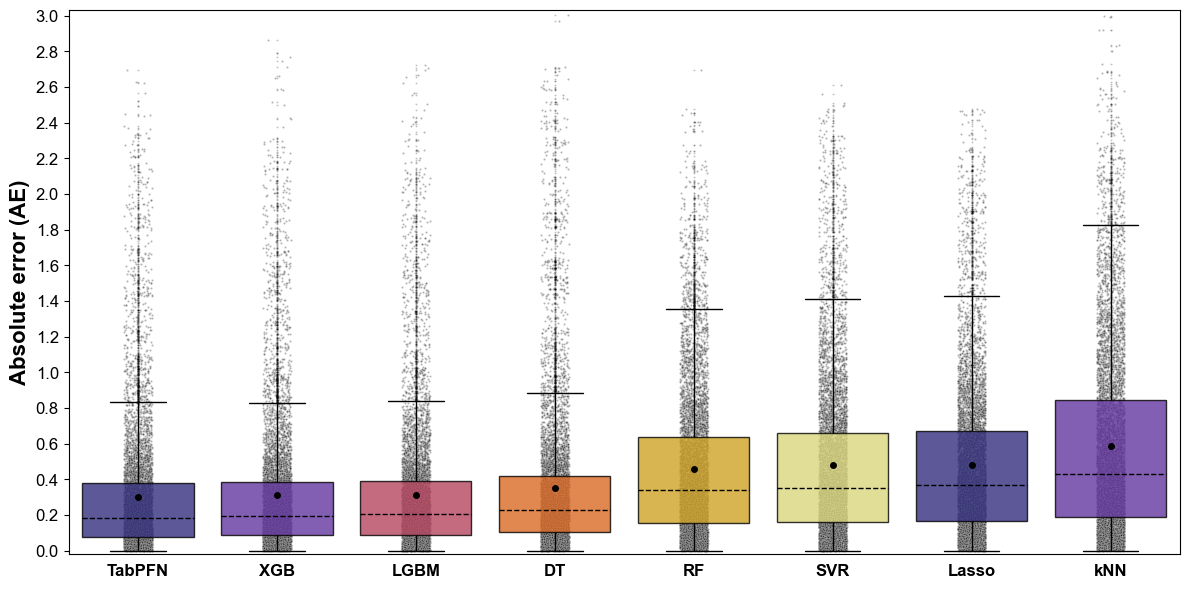

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# figure set-up - size
f, boxplot = plt.subplots(figsize=(12, 6))

# choose color scheme
#palette = sns.color_palette("Paired")
#palette = sns.color_palette("pastel")
#palette = sns.color_palette("tab10")
palette = sns.color_palette("CMRmap")

# set boxplot style
boxplot = sns.set_style("white")

# boxplot set up and box-whis style
boxplot = sns.boxplot(palette=palette, 
                      data=df9, saturation = 0.8,
                      boxprops = dict(linewidth=1.0, edgecolor='black', alpha = 0.8),
                      whiskerprops = dict(linewidth=1.0, color='black'),
                      capprops = dict(linewidth=1.0, color='black'),
                      flierprops=dict(marker="d", markerfacecolor= "black", markeredgecolor="black", 
                                      markersize =0.5, alpha=0.2),
                      medianprops=dict(color="black", linewidth=1.0, linestyle= '--'), 
                      showmeans=True,
                      meanprops=dict(marker="o", markerfacecolor="black", alpha=1.0,
                                     markeredgecolor="black", markersize=4, linewidth=0.05, zorder=10))

# include each datapoint
boxplot = sns.stripplot(data=df9, marker="o", edgecolor='white', 
                        alpha=0.3, size=1.5, linewidth=0.3, color='black', jitter = True, zorder=0)

# Title
#boxplot.axes.set_title("ML model performance ranked by mean absolute error", fontsize=18, color="white", weight="bold")

# Title - x-axis/y-axis
#boxplot.set_xlabel("Model index", fontsize=12)
boxplot.set_ylabel("Absolute error (AE)", fontsize=16, color='black', 
                   weight="bold")

# y-axis limits and interval
boxplot.set(ylim=(-0.02, 3.03), yticks=np.arange(0,3.03,0.2))
#sns.despine(left=False, bottom=False)

# x-axis rotation and text color
boxplot.set_xticklabels(boxplot.get_xticklabels(),rotation = 0, color='black', fontsize=12)

# x-axis and y-axis tick color
boxplot.tick_params(colors='black', which='both')  # 'both' refers to minor and major axes

# x-axis and y-axis label color
boxplot.axes.yaxis.label.set_color('black')
boxplot.axes.xaxis.label.set_color('black')

# format graph outline (color)
boxplot.spines['left'].set_color('black')
boxplot.spines['bottom'].set_color('black')
boxplot.spines['right'].set_color('black')
boxplot.spines['top'].set_color('black')

# add tick marks on x-axis or y-axis
boxplot.tick_params(bottom=False, left=True)

# statistical annotation
# text you want to show in italics
x1, x2 = 0, 1  
y, h, col = 2.7, 0.03, 'black'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
# plt.text((x1+x2)*.5, y+h+0.01, '$\it{p < 0.05}$', ha='center', va='bottom', color=col, fontsize=10)

# statistical annotation
#text you want to show in italics
#x1, x2 = 0, 2  
#y, h, col = 0.925, 0.02, 'black'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.75, c=col)
#plt.text((x1+x2)*.5, y+h+0.01, '$\it{p < 0.05}$', ha='center', va='bottom', color=col)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12, weight = "bold")

plt.tight_layout()

plt.savefig('BoxPLot.png', dpi=600, format = 'png', transparent=True, bbox_inches='tight')

#plt.show()